# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# ===============================================
# Paolo Vega
# Bootcamp Data Analytics
# Version   1.0.0 03/26/2020
#           1.0.1 03/27/2020
#           1.0.2 03/28/2020
#           1.0.3 03/29/2020
#           1.0.4 03/30/2020
#           1.0.5 03/31/2020
# ===============================================


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
display(len(cities))

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Set teh column names
column_names = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]
# Specify the number os cities to request
no_cities = 500
# Create an empty data frame
cities_df = pd.DataFrame(columns = column_names, index = np.arange(0,no_cities))

In [8]:
# Create a Dataframe based on the citinames
element_df = {
    "City": "",
    "Cloudiness": 0,
    "Country" : "",
    "Date" : 0,
    "Humidity" : 0,
    "Lat" : 0,
    "Lng" : 0,
    "Max Temp" : 0,
    "Wind Speed" : 0
}


# Define the parameters for the request
params = {
    "appid" :  weather_api_key,
    "q" : "",
    "units": "metric"
}

# Determine how many cities we have gone through from those available
city_index = 0
# Determine how many cities we count to get to no_cities
df_index = 0

# request 7 pages each 100 cities 
for page in range(0,7):    
    for result in range(0,100):
        # have we couted 500? Stop, continue
        if(df_index == 500):
            break;        
        params["q"] = cities[city_index] # random city name
        base_url = "http://api.openweathermap.org/data/2.5/weather"
        try:
            display(f"Loading  city: {cities[city_index]} - Page {page+1} - Request No {city_index + 1} - City No {df_index + 1} ... ")
            response = requests.get(base_url,params=params).json()
            cities_df["City"][df_index] = response["name"]
            cities_df["Cloudiness"][df_index] = response["clouds"]["all"]
            cities_df["Country"][df_index] = response["sys"]["country"]
            cities_df["Date"][df_index] = response["dt"]
            cities_df["Humidity"][df_index] = round(float(response["main"]["humidity"]),2)
            cities_df["Lat"][df_index] = round(float(response["coord"]["lat"]),2)
            cities_df["Lng"][df_index] = round(float(response["coord"]["lon"]),2)
            cities_df["Max Temp"][df_index] = round(float(response["main"]["temp_max"]),2)
            cities_df["Wind Speed"][df_index] = round(float(response["wind"]["speed"]),2)
            df_index += 1
        except KeyError:
            print(f"Oh, oh. City not found. Let's try another one")
        city_index += 1


'Loading  city: cape town - Page 1 - Request No 1 - City No 1 ... '

'Loading  city: lata - Page 1 - Request No 2 - City No 2 ... '

'Loading  city: hay river - Page 1 - Request No 3 - City No 3 ... '

'Loading  city: chokurdakh - Page 1 - Request No 4 - City No 4 ... '

'Loading  city: buchanan - Page 1 - Request No 5 - City No 5 ... '

'Loading  city: ponta do sol - Page 1 - Request No 6 - City No 6 ... '

'Loading  city: wynyard - Page 1 - Request No 7 - City No 7 ... '

'Loading  city: kamenice nad lipou - Page 1 - Request No 8 - City No 8 ... '

'Loading  city: rikitea - Page 1 - Request No 9 - City No 9 ... '

'Loading  city: trapani - Page 1 - Request No 10 - City No 10 ... '

'Loading  city: lebu - Page 1 - Request No 11 - City No 11 ... '

'Loading  city: taolanaro - Page 1 - Request No 12 - City No 12 ... '

Oh, oh. City not found. Let's try another one


'Loading  city: tiksi - Page 1 - Request No 13 - City No 12 ... '

'Loading  city: atuona - Page 1 - Request No 14 - City No 13 ... '

'Loading  city: sao joao da barra - Page 1 - Request No 15 - City No 14 ... '

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
# Export the dataframe
cities_df.to_csv("../output_data/cities.csv",index=False)
# Load the csv to facilitae access to data
cities_df = pd.read_csv("../output_data/cities.csv")
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mathbaria,0,BD,1585526597,41.0,22.29,89.96,24.41,1.77
1,Punta Arenas,75,CL,1585526598,57.0,-53.15,-70.92,11.00,5.70
2,Praia,40,CV,1585526598,78.0,14.92,-23.51,22.00,7.70
3,Lebu,0,CL,1585526598,68.0,-37.62,-73.65,12.86,7.69
4,Ketchikan,90,US,1585526419,93.0,55.34,-131.65,4.00,10.30


In [3]:
# Set min and max limits to display graphs
min_Lat = cities_df["Lat"].min() - 5
max_Lat = cities_df["Lat"].max() +  5

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

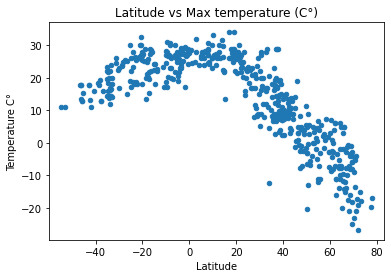

In [4]:
cities_df.plot(x="Lat",y="Max Temp", kind="scatter",title="Latitude vs Max temperature (C°)",xlim=(min_Lat,max_Lat))
plt.xlabel("Latitude")
plt.ylabel("Temperature C°")
plt.savefig("../output_data/Latitude vs Max temperature (C°).png")
plt.show()

# This first graph shows an interesting pattern in a lower temperature as we go away from the Ecuator (Latitude 0).
# The temperature seems to be warmer in the Northern Hemisphere as we approch the ecuator. 
# Originally, it was too cold (less than -20°C)
# The same pattern is shown in the Southern Hemisphere. This rate though, is not so intense in contrast with 
# the opposite side. Therefore, there is a clear relationship between the temperature and the Latitude.

#### Latitude vs. Humidity Plot

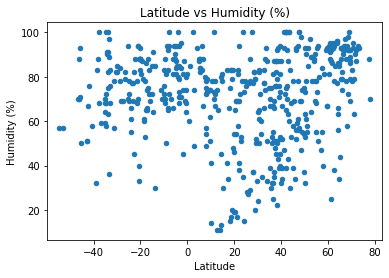

In [5]:
cities_df.plot(x="Lat", y="Humidity",kind="scatter",title="Latitude vs Humidity (%)",xlim=(min_Lat,max_Lat))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/Latitude vs Humidity (%).png")
plt.show()


# This graph does not show a clear relationship between these two variables. It's worth noting that 
# there is a high concentration of humidity around the globe regardless the location. 
# Only a few cities mantain low ranges of humidity.

#### Latitude vs. Cloudiness Plot

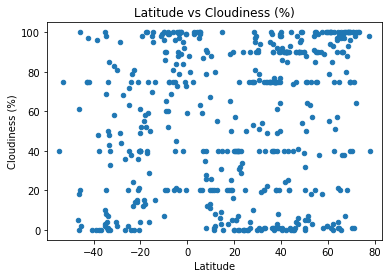

In [6]:
cities_df.plot(x="Lat", y="Cloudiness", kind="scatter",title="Latitude vs Cloudiness (%)",xlim=(min_Lat,max_Lat))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/Latitude vs Cloudiness (%).png")
plt.show()

# This graph interestingly shows a constante cloudiness percentage for some cities in different location.
# We can see some horizontal line patterns at 100%, 80%, 40% and 20% cloudiness
# In some cases, the places situated at the same latitude may present absence of cloudiness (0%) 
# or have complete presence (100%) of it. As a result, Latitud does not necessarily explain the cloudiness percentage

#### Latitude vs. Wind Speed Plot

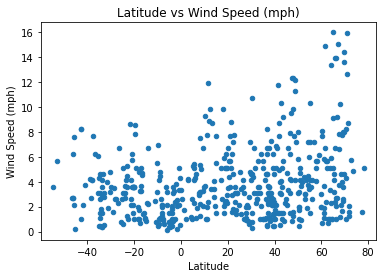

In [7]:
cities_df.plot(x="Lat", y="Wind Speed", kind="scatter",title="Latitude vs Wind Speed (mph)",xlim=(min_Lat,max_Lat))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/Latitude vs Wind Speed (mph).png")
plt.show()

# This graph shows a high concentration of low wind speed around the globe.
# Only a few places in the Northern Hemisphere oresent a wind speed between 12 and 16 mph.
# However, the majority of them have low speed ranges

## Linear Regression

In [127]:
# OPTIONAL: Create a function to create Linear Regression plots

In [8]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = cities_df.loc[cities_df["Lat"] > 0.0]
southern_df = cities_df.loc[cities_df["Lat"] < 0.0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r values is: -0.89
 The equation is: -0.64x + -0.64


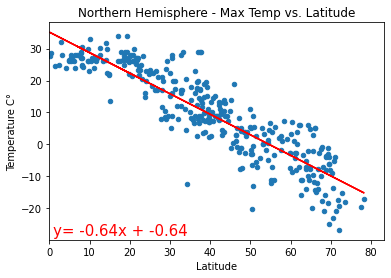

In [59]:
# Linear Regression Model
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
y_lr_values = []

# Calculate the regression model
slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

# Calculate the y = Mx + b values
for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The r values is: {round(rvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

# Plot the scatter plot and the regression model line
ax = northern_df.plot(x = "Lat", y = "Max Temp", kind="scatter",title="Northern Hemisphere - Max Temp vs. Latitude", xlim=(0,max_Lat))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature C°")

# Add the equation in the graph
ax.text(0.012, 0.02, f"y= {round(slope,2)}x + {round(slope,2)}",
        transform=ax.transAxes,
        color='red', fontsize=15)
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude.png")


plt.show()

# This graph shows a negative correlation between latitud and Temperature in the Northern Hemisphere.
# The further we are from the Ecuator, the colder it gets (as we already know)
# Statistically, -0.89 confirms the negative correlation we obseve in the graph

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r values is: 0.64
 The equation is: 0.24x + 0.24


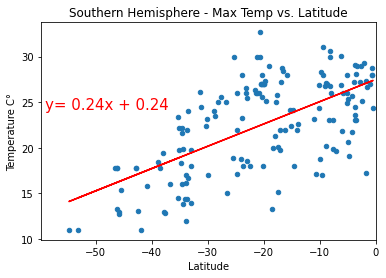

In [55]:
# Linear Regression Model
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
y_lr_values = []

# Calculate the regression model
slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

# Calculate the y = Mx + b values
for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The r values is: {round(rvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

# Plot the scatter plot and the regression model line
ax = southern_df.plot(x = "Lat", y = "Max Temp", kind="scatter",title="Southern Hemisphere - Max Temp vs. Latitude",xlim=(min_Lat,0))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature C°")

# Add the equation in the graph
ax.text(0.012, 0.60, f"y= {round(slope,2)}x + {round(slope,2)}",
        transform=ax.transAxes,
        color='red', fontsize=15)
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude.png")
plt.show()

# This graph shows a positive correlation between latitud and Temperature in the Southern Hemisphere.
# The closer  we are from the Ecuator, the warmer it gets (as we already know)
# According to the data we have, the 0.64 rvalue shows a negative correlation not so remarked as the one happening in the
# Northern Hemisphere, where we could observe colder temperatures.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r values is: 0.29
 The equation is: 0.32x + 0.32


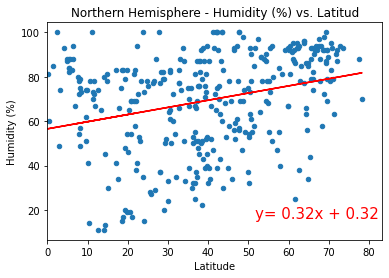

In [51]:
# Linear Regression Model
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
y_lr_values = []

# Calculate the regression model
slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

# Calculate the y = Mx + b values
for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The r values is: {round(rvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

# Plot the scatter plot and the regression model line
ax = northern_df.plot(x = "Lat", y = "Humidity", kind="scatter",title="Northern Hemisphere - Humidity (%) vs. Latitud",xlim=(0,max_Lat))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add the equation in the graph
ax.text(0.62, 0.10, f"y= {round(slope,2)}x + {round(slope,2)}",
        transform=ax.transAxes,
        color='red', fontsize=15)
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitud.png")
plt.show()

# This graph shows a slightly distribution of humidity towards northern locations.
# The r value demonstrates a positive correlation between humidity and latitude that can be hardly perceived in the data.
# However, we can see a higher concentration of points in the highest latitude by looking at the distribution of the data.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r values is: 0.2
 The equation is: 0.22x + 0.22


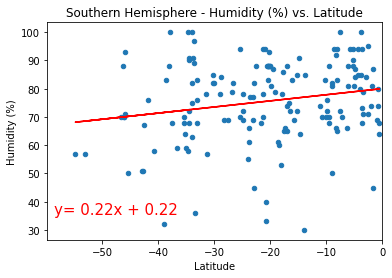

In [77]:
# Linear Regression Model
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
y_lr_values = []

# Calculate the regression model
slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

# Calculate the y = Mx + b values
for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The r values is: {round(rvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

# Plot the scatter plot and the regression model line
ax = southern_df.plot(x = "Lat", y = "Humidity", kind="scatter",title="Southern Hemisphere - Humidity (%) vs. Latitude",xlim=(min_Lat,0))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add the equation in the graph
ax.text(0.02, 0.12, f"y= {round(slope,2)}x + {round(slope,2)}",
        #verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()

# This graph shows an interesting pattern of high humidity moving towards the Ecuator
# The r value demonstrates a slighlty  pisitive correlation between humidity and latitude that can be hardly perceived in the data.
# We can se that as for some locations approaching the Ecuator, their Humidty (%) increases as well.
# in fact, wew observe that the majority of those points present a percentage between 60% and 90%

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r values is: 0.25
 The equation is: 0.47x + 0.47


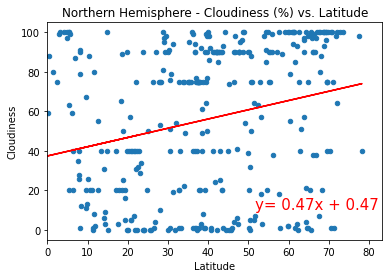

In [78]:
# Linear Regression Model
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
y_lr_values = []

# Calculate the regression model
slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

# Calculate the y = Mx + b values
for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The r values is: {round(rvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

# Plot the scatter plot and the regression model line
ax = northern_df.plot(x = "Lat", y = "Cloudiness", kind="scatter",title="Northern Hemisphere - Cloudiness (%) vs. Latitude",xlim=(0,max_Lat))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add the equation in the graph
ax.text(0.62, 0.14, f"y= {round(slope,2)}x + {round(slope,2)}",
        #verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()

# This graph shows an interesting horizontal pattern of the  percentage of cloudiness for northern locations.
# We can perceive some constant lines at 0%, 20%, 40%, 80% and 100%
# The r value shows a small positive correlation, but it not easy to see in the data but it is also intriguing
# that regardless the latitude, some locations may present the same percentage of cloudiness

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r values is: 0.41
 The equation is: 1.07x + 1.07


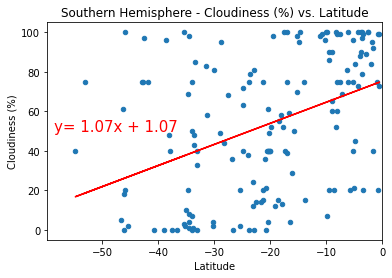

In [80]:
# Linear Regression Model
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
y_lr_values = []

# Calculate the regression model
slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

# Calculate the y = Mx + b values
for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The r values is: {round(rvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

ax = southern_df.plot(x = "Lat", y = "Cloudiness", kind="scatter",title="Southern Hemisphere - Cloudiness (%) vs. Latitude",xlim=(min_Lat,0))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add the equation in the graph
ax.text(0.02, 0.50, f"y= {round(slope,2)}x + {round(slope,2)}",
        #verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()

# For the Southern Hemisphrere we observe a similar pattern in which the closer to the Ecuator, the greater percentage
# of cloudiness we consider.
# Statistically we have a considerable positive correlation between latitude and cloudiness by looking at the r value
# However, this Hemisphere does not present the horizontal line patter observed in the North

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r values is: 0.18
 The equation is: 0.03x + 0.03


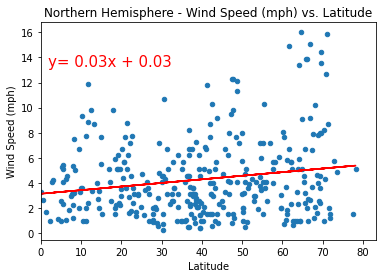

In [81]:
# Linear Regression Model
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
y_lr_values = []

# Calculate the regression model
slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

# Calculate the y = Mx + b values
for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The r values is: {round(rvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

ax = northern_df.plot(x = "Lat", y = "Wind Speed", kind="scatter",title="Northern Hemisphere - Wind Speed (mph) vs. Latitude",xlim=(0,max_Lat))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add the equation in the graph
ax.text(0.02, 0.80, f"y= {round(slope,2)}x + {round(slope,2)}",
        #verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

plt.show()

# For the Northern Hemisphere we observe that the majority of the locations present low speed wind ranges.
# Statiscally, we have a slightly positive correlation between wind speed and latitud.
# There are some points witht the heighest latitude that present high wind speed values that we 
# need to further investigate

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r values is: -0.29
 The equation is: -0.04x + -0.04


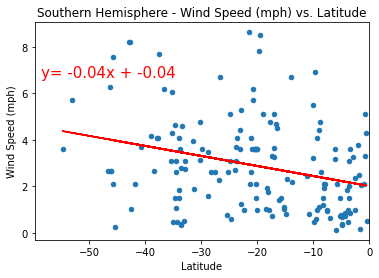

In [82]:
# Linear Regression Model
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
y_lr_values = []

# Calculate the regression model
slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

# Calculate the y = Mx + b values
for lat in x_values:
    y_lr_values.append(round((slope * lat + intercept),2))

print(f" The r values is: {round(rvalue,2)}")
print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")

# Add the equation in the graph
ax = southern_df.plot(x = "Lat", y = "Wind Speed", kind="scatter",title="Southern Hemisphere - Wind Speed (mph) vs. Latitude",xlim=(min_Lat,0))
plt.plot(x_values, y_lr_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
ax.text(0.02, 0.75, f"y= {round(slope,2)}x + {round(slope,2)}",
        #verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")

plt.show()

# The Southern Hemisphere presents a negative correlation as we get closer to the Ecuator, the wind speed descends.
# We can perceive thiss patter in the data by looking at the concentration of points in the lower right-hand corner (near the Ecuator)
# 